# Medicine Risk Prediction Using Machine Learning

1.Problem Statement

The goal of this project is to predict the risk level of a medicine (Low, Medium, or High) based on its textual information such as composition, uses, and side effects. This helps in understanding potential medicine risks using machine learning techniques.

2.Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

3.Load the Dataset

In [60]:
df = pd.read_csv("Medicine_Details.csv")


4.Understanding the Dataset

Shape of the data

In [61]:
df.shape

(11825, 9)

Column names

In [62]:
df.columns

Index(['Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Image URL',
       'Manufacturer', 'Excellent Review %', 'Average Review %',
       'Poor Review %'],
      dtype='object')

First 5 rows

In [98]:
df.head(30)

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %,Risk Level,Text_Data
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22,Medium,Bevacizumab (400mg) Cancer of colon and rectu...
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18,Low,Amoxycillin (500mg) + Clavulanic Acid (125mg...
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21,Medium,Azithromycin (500mg) Treatment of Bacterial in...
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35,Medium,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29,Medium,Ranitidine (150mg) Treatment of Gastroesophage...
5,Allegra 120mg Tablet,Fexofenadine (120mg),Treatment of Sneezing and runny nose due to al...,Headache Drowsiness Dizziness Nausea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sanofi India Ltd,35,42,23,Medium,Fexofenadine (120mg) Treatment of Sneezing and...
6,Avil 25 Tablet,Pheniramine (25mg),Treatment of Allergic conditionsTreatment of R...,Sedation,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Sanofi India Ltd,40,34,26,Low,Pheniramine (25mg) Treatment of Allergic condi...
7,Aricep 5 Tablet,Donepezil (5mg),Alzheimer's disease,Common cold Urinary incontinence Rash Nausea D...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Eisai Pharmaceuticals India Pvt Ltd,43,28,29,Low,Donepezil (5mg) Alzheimer's disease Common co...
8,Amoxyclav 625 Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Abbott,36,43,21,Medium,Amoxycillin (500mg) + Clavulanic Acid (125mg...
9,Atarax 25mg Tablet,Hydroxyzine (25mg),Treatment of AnxietyTreatment of Skin conditio...,Sedation Nausea Vomiting Upset stomach Constip...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Dr Reddy's Laboratories Ltd,35,41,24,Medium,Hydroxyzine (25mg) Treatment of AnxietyTreatme...


Data types

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11825 non-null  object
 1   Composition         11825 non-null  object
 2   Uses                11825 non-null  object
 3   Side_effects        11825 non-null  object
 4   Image URL           11825 non-null  object
 5   Manufacturer        11825 non-null  object
 6   Excellent Review %  11825 non-null  int64 
 7   Average Review %    11825 non-null  int64 
 8   Poor Review %       11825 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 831.6+ KB


5.Data Cleaning

Check for missing values

In [65]:
df.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

Drop rows with missing values

Missing values can negatively affect model performance, so they are removed.

In [66]:
df.dropna(inplace=True)

Check duplicates

In [67]:
df.duplicated().sum()

84

Remove duplicate rows

In [68]:
df = df.drop_duplicates()

6.Target Variable Engineering

Create Risk Level column

In [69]:
import numpy as np

conditions = [
    df['Poor Review %'] >= df[['Excellent Review %', 'Average Review %']].max(axis=1),
    df['Average Review %'] >= df[['Excellent Review %', 'Poor Review %']].max(axis=1)
]

choices = ['High', 'Medium']

df['Risk Level'] = np.select(conditions, choices, default='Low')

Verify target distribution

In [84]:
df['Risk Level'].value_counts(normalize=True)

Risk Level
Medium    0.405247
Low       0.373733
High      0.221020
Name: proportion, dtype: float64

7.Exploratory Data Analysis (EDA)

Risk Level Distribution

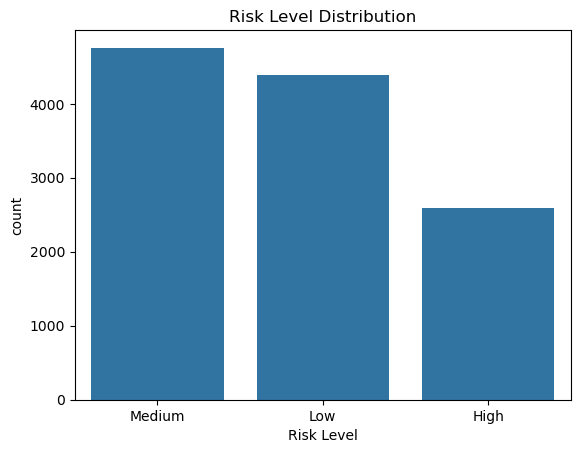

In [71]:
sns.countplot(x='Risk Level', data=df)
plt.title('Risk Level Distribution')
plt.show()

8.Feature Engineering (Text Data)

Combine relevant text columns

In [72]:
df['Text_Data'] = (
df['Composition'] + " " +
df['Uses'] + " " +
df['Side_effects']
)

Define features and target

In [73]:
X = df['Text_Data']
y = df['Risk Level']

9.Text Vectorization (TF-IDF)

In [74]:
tfidf = TfidfVectorizer(
stop_words='english',
max_features=5000,
ngram_range=(1,2)
)


X_tfidf = tfidf.fit_transform(X)

10.Train-Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
X_tfidf, y,
test_size=0.2,
random_state=42,
stratify=y
)

11.Baseline Model – Naive Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)


nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Accuracy: 0.4444444444444444


12.Final Model – Logistic Regression

In [77]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

13.Model Evaluation

In [78]:
y_pred = lr_model.predict(X_test)


print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.44870157513835673

Classification Report:

              precision    recall  f1-score   support

        High       0.35      0.14      0.20       519
         Low       0.47      0.53      0.50       878
      Medium       0.45      0.54      0.49       952

    accuracy                           0.45      2349
   macro avg       0.42      0.40      0.40      2349
weighted avg       0.44      0.45      0.43      2349



Confusion Matrix

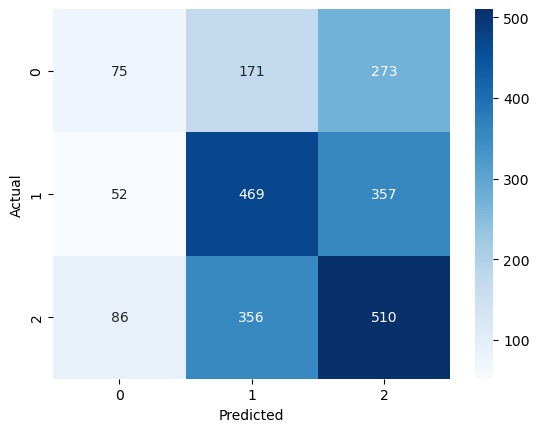

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

14.Cross-Validation

In [80]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X_tfidf, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.4274749920768053


15.Prediction on New Data

In [100]:
new_medicine = ["Anastrozole (1mg) may cause Hot flashes, joint pain, and fatigue"]

new_vector = tfidf.transform(new_medicine)
prediction = lr_model.predict(new_vector)

print("Predicted Risk Level:", prediction[0])

Predicted Risk Level: Medium


Conclusion:

This project focused on predicting the risk level of medicines using patient review data. Text processing techniques and machine learning models were used to analyze the reviews and classify medicines into different risk categories. The results show that patient reviews contain useful information that can help in identifying potential medicine risks.

Among the models used, Logistic Regression performed better and provided more reliable predictions. However, the system depends only on review text, which may sometimes be subjective or incomplete. Important medical factors such as dosage, patient age, and medical history were not included.

In the future, the model can be improved by using more data, adding medical-related features, and applying advanced machine learning or deep learning techniques. Overall, this project demonstrates how machine learning can be used to support better decision-making in healthcare.